In [1]:
import numpy as np
from matplotlib import pyplot as plt
import agents_enviroments


In [2]:
bays = [agents_enviroments.Bay() for _ in range(6)]
ward = agents_enviroments.Ward(bays, C=0.03, V=1, m=0.67, k=0.4)


In [3]:
patient_generator = agents_enviroments.PatientGenerator()
patient_generator.set_var(poisson_lambda=5,gamma_k=4,gamma_scale=1)


In [4]:
time = np.arange(350)
for t in time:
    ward.remove_patients()
    ward.screen_patients_get_results()
    patients = patient_generator.generate(colonized_prob=0.02)
    ward.admit_patients(patients=patients)
    ward.generate_transmission()
    ward.update_history()
    ward.forward_time()
    

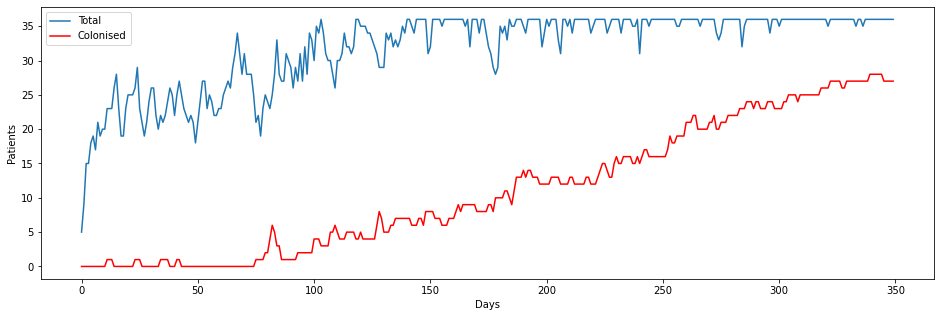

In [5]:
plt.figure(figsize=(16,5))
plt.plot(time,ward.history["admission_sequence"])
plt.plot(time,ward.history["colonized_sequence"],color='red')
plt.legend(["Total","Colonised","New"])
plt.xlabel("Days")
plt.ylabel("Patients")
plt.show()